<a href="https://colab.research.google.com/github/jang-jinyeol/Machine_Learning/blob/main/%EB%B6%84%EB%A5%98%EC%9A%A9%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
선형 모델은 분류에서도 널리 사용된다.
먼저 이진 분류(binary classification)를 살펴보겠다.
(hypothesis)y = w[0] * x[0] + w[1] * x[1] +...+ w[p] * x[p] + b > 0

이 방정식은 선형 회귀와 아주 비슷하다. 하지만 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을
임계치 0과 비교한다. 함수에서 계산한 값이 0보다 작으면 클래스를 -1이라고 예측하고 0보다 크면 +1이라고 예측한다.
이 규칙은 분류에 쓰이는 모든 선형모델에서 동일하다. 여기에서도 계수(w)와 절편(b)를 찾기 위한 방법이 많이 있다.

회귀용 선형 모델에서는 출력 (hypothesis)y이 특성의 선형 함수였다.
즉 직선, 평면, 초평면(차원이 3 이상일 때)
분류용 선형 모델에서는 결정 경계(decision boundary)가 입력의 선형 함수이다.

다른 말로하면 (이진) 선형 분류기는 선, 평면, 초평면을 사용해서 두 개의 클래스를 구분하는 분류기이다.

선형 모델을 학습시키는 알고리즘은 다양한데, 다음의 두 방법으로 구분할 수 있다.

※ 특정 계수와 절편의 조합이 훈련 데이터에 얼마나 잘 맞는지 측정하는 방법
※ 사용할 수 있는 규제가 있는지, 있다면 어떤 방식인지

'''
scikit-learn에서 로지스틱 회귀의 predict메서드는  선형 함수 값을 계산해주는 decision_function 메서드를 사용해
0을 기준으로 예측을 만들며 시그모이드 함수를 적용한 확률값은 predict_proba 메서드에서 제공한다.
'''

가장 널리 알려진 두개의 선형 분류 알고리즘은 linear_model.LogisticRegression에 구현된 로지스틱 회귀(logistic regression)과
support vector machine이다. LogisticRegression에 Regression(회귀)이 들어가지만 회귀 알고리즘이 아니라 분류 알고리즘 이므로
LinearRegression과 혼동하면 안 된다.

forge 데이터셋을 사용하여 LogisticRegression과 LinearSVC 모델을 만들고 이 선형 모델들이 만들어낸 결정 경계를 그림으로 나타내보겠다.

In [19]:
import numpy as np
a = np.random.randint(0, 9, (3, 3))
copied_a1 = np.copy(a)
print(copied_a1[:,1 ])
print("-------------")
print(copied_a1)

[2 4 6]
-------------
[[3 2 3]
 [0 4 5]
 [0 6 6]]


In [1]:
!pip install mglearn
import mglearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

     |████████████████████████████████| 540 kB 5.3 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=7936a5412283a2f551f5eb75fa682ef31c77d23b35c47fec364017c3805e2cf9
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


'\n회귀에서 본 Ridge와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용한다.\nLogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.\nC의 값이 높아지면 규제가 감소한다.\n매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 계수 벡터(w)가\n에 가까워지도록 만든다. (alpha와 반대로 외우자, 규제가 높아지면 계수벡터(w)가 0에 가까워짐 혼동 X)\n'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


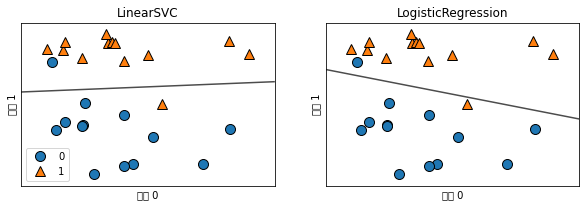

In [44]:
#from sklearn.neighbors import KNeighborsClassifier





from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X,y = mglearn.datasets.make_forge()


fig, axes = plt.subplots(1, 2, figsize=(10,3))


for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
  clf = model.fit(X, y)
  # 2차원 데이터셋 분할 평면 그리기
  # model객체, train 데이터, 평면 칠하기, alpha <- 투명도
  mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)

  mglearn.discrete_scatter(X[:, 0],X[:, 1],y, ax=ax)
  ax.set_title("{}".format(clf.__class__.__name__))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")
axes[0].legend()
"""
회귀에서 본 Ridge와 마찬가지로 이 두 모델은 기본적으로 L2 규제를 사용한다.
LogisticRegression과 LinearSVC에서 규제의 강도를 결정하는 매개변수는 C이다.
C의 값이 높아지면 규제가 감소한다.
매개변수로 높은 C 값을 지정하면 LogisticRegression과 LinearSVC는 훈련 세트에 가능한 최대로 맞추려 하고, 반면에 C 값을 낮추면 모델은 계수 벡터(w)가
에 가까워지도록 만든다. (alpha와 반대로 외우자, 규제가 높아지면 계수벡터(w)가 0에 가까워짐 혼동 X)
"""

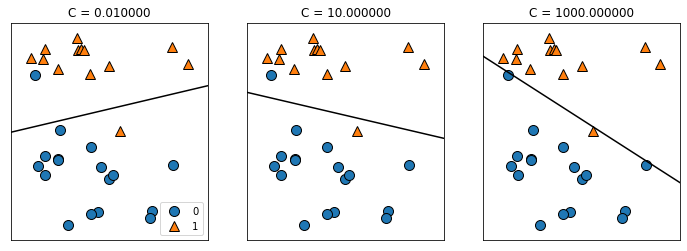

In [40]:
# LinearSVC를 사용한 예
# C가 커지면 규제가 완화 (과대적합 가능성 올라감)
mglearn.plots.plot_linear_svc_regularization()

In [50]:
"""
회귀와 비슷하게 분류에서의 선형 모델은 낮은 차원의 데이터에서는 결정 경계가 직선이거나 평면이어서 매우 제한적인 것처럼 보인다.
하지만 고차원에서는 분류에 대한 선형 모델이 매우 강력해지며 특성이 많아지면 과대적합이 되지 않도록 하는 것이 매우 중요 함.

유방암 데이터셋을 사용해서 LogisticRegression을 좀 더 자세히 분석해보자.
"""

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("훈련 세트 점수: {:.3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

# 기본값 C=1이 훈련 세트와 테스트 세트 양쪽에 95% 정확도로 꽤 훌륭한 성능을 내고 있다.
########하지만 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같다.############
# 제약을 더 풀어주기 위해 C를 증가시켜준다.

print("\n")
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

# 규제를 더 강하게 하기 위해 기본값(C=0.01) 사용해봄
print("\n")
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))
# 복잡도가 감소 (fit 나타내는 그래프 기준으로<- 로 이동) 하므로 훈련 세트와 테스트 세트의 정확도는 기본 매개변수일 때보다 낮아진다. 


훈련 세트 점수: 0.953
테스트 세트 점수: 0.958


훈련 세트 점수: 0.955
테스트 세트 점수: 0.944


훈련 세트 점수: 0.934
테스트 세트 점수: 0.930


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53356 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_te

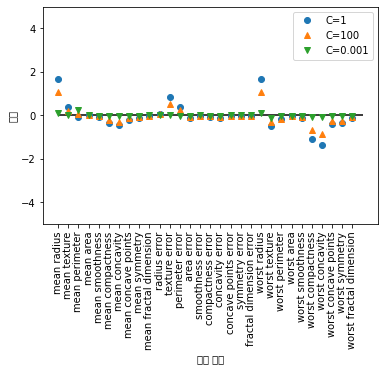

In [85]:
# 이번에는 규제 매개변수 C 설정을 세 가지로 다르게 하여 학습시킨 모델의 계수를 확인
# coef_.T는 coef_ 행렬의 전치 행렬을 반환한다.
# print("{}".format(cancer.keys()))

plt.plot(logreg.coef_.T,'o', label="C=1")
plt.plot(logreg100.coef_.T,'^', label="C=100")
plt.plot(logreg001.coef_.T,'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names, rotation=90 )
plt.hlines(0,0,cancer.data.shape[1])
plt.ylim(-5,5)
plt.ylabel("특성")
plt.xlabel("계수 크기")
plt.legend()

